In [1]:
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from scipy.optimize import fmin, minimize
from sklearn import datasets
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

## Logistic Regression

Logistic Regression reduces to the following optimization problem:
$$\underset{w}{\text{min }} NLL(w) = \underset{w}{\text{min }} -\sum_{i=1}^{N}y_i log(\sigma(w^Tx_i)) + (1-y_i)log(1-\sigma(w^Tx_i))$$

In [2]:
class MyLogisticRegression():
    """Vanilla implementation of Logistic Regression including a bias."""
    def sigm(self, a):
        """Vectorized implementation of the sigmoid function."""
        return 1/(1 + np.exp(-a))
    
    def neg_loglikelihood(self, w):
        """Implementation of the NLL(w) as defined above"""
        
        # Append 1's for bias term.
        Xt = np.hstack((X, np.ones((X.shape[0],1)))).copy().T

        mu = self.sigm(w.dot(Xt))
        NLL = -np.sum(y.dot(np.log(mu)) + (1-y).dot(np.log(1-mu)))

        return NLL
    
    def fit(self, X, y):
        """
        Fit the Logistic Regression classifier with training data, X, and
        target labels, y.
        """
        # solve for optimal weight coefficients, w
        w = minimize(self.neg_loglikelihood, np.random.randn(X.shape[1]+1), method="CG").x
    
        # separate coefficients and intercept
        self.w_hat = w[:-1]
        self.w0 = w[-1]
        
    def predict(self, X, thres=0.5):
        """Make a prediction based on test data, X using threshold 0.5"""
        return (self.sigm(self.w_hat.dot(X.T) + self.w0) > thres).astype(int) 

## The Dataset

<IPython.core.display.Javascript object>


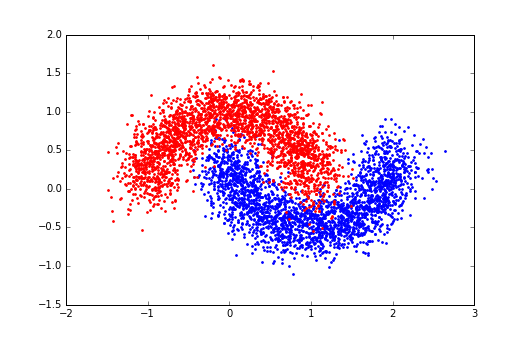

In [3]:
X, y = datasets.make_moons(5000, noise=.2)
plt.scatter(X[y==1,0], X[y==1,1], color='blue', s=3)
plt.scatter(X[y==0,0], X[y==0,1], color='red', s=3)
plt.show()

### Create the Training and Testing Sets

In [4]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=.7)

## Model Evaluation

### Check Accuracy

In [5]:
my_logreg = MyLogisticRegression()
my_logreg.fit(Xtrain, ytrain)
print "My Logistic Regression:", (my_logreg.predict(Xtest) == ytest).mean()

sk_logreg = LogisticRegression()
sk_logreg.fit(Xtrain, ytrain)
print "Sci-kit's Logistic Regression:", (sk_logreg.predict(Xtest) == ytest).mean()

My Logistic Regression: 0.875333333333
Sci-kit's Logistic Regression: 0.874


### Check Answers

In [6]:
print "My Coefficients:", my_logreg.w_hat
print "Sci-kit's Coefficients:", sk_logreg.coef_[0]
print ""
print "My Intercept:", my_logreg.w0
print "Sci-kit's Intercept", sk_logreg.intercept_[0]

My Coefficients: [ 1.23103977 -4.94840134]
Sci-kit's Coefficients: [ 1.2352952  -4.82395834]

My Intercept: 0.586116845086
Sci-kit's Intercept 0.579555288389


### Check Timing

In [7]:
%%timeit
# My version

my_logreg = MyLogisticRegression()
my_logreg.fit(Xtrain, ytrain)
my_predictions = my_logreg.predict(Xtest)

1 loop, best of 3: 188 ms per loop


In [8]:
%%timeit
# Sci-kit's version

sk_logreg = LogisticRegression()
sk_logreg.fit(Xtrain, ytrain)
sk_predictions = sk_logreg.predict(Xtest)

100 loops, best of 3: 3.46 ms per loop


## Logistic Regression with L2-Regularization

Logistic Regression with l2-regularization reduces to the following optimization problem:
$$\underset{w}{\text{min }} NLL(w) = \underset{w}{\text{min }} -\sum_{i=1}^{N}y_i log(\sigma(w^Tx_i)) + (1-y_i)log(1-\sigma(w^Tx_i)) + \lambda||w||_2^2$$

In [9]:
class MyLogisticRegression():
    """Vanilla implementation of Logistic Regression including a bias."""
    
    def __init__(self, lmda=0):
        self.lmda = lmda
    
    def sigm(self, a):
        """Vectorized implementation of the sigmoid function."""
        return 1/(1 + np.exp(-a))
    
    def neg_loglikelihood(self, w):
        """Implementation of the NLL(w) as defined above"""
        
        # Append 1's for bias term.
        Xt = np.hstack((X, np.ones((X.shape[0],1)))).T

        mu = self.sigm(w.dot(Xt))
        NLL = -np.sum(y.dot(np.log(mu)) + (1-y).dot(np.log(1-mu))) + self.lmda*(w.dot(w))

        return NLL
    
    def fit(self, X, y):
        """
        Fit the Logistic Regression classifier with training data, X, and
        target labels, y.
        """
        # solve for optimal weight coefficients, w
        w = minimize(self.neg_loglikelihood, np.random.randn(X.shape[1]+1), method="CG").x
    
        # separate coefficients and intercept
        self.w_hat = w[:-1]
        self.w0 = w[-1]
        
    def predict(self, X, thres=0.5):
        """Make a prediction based on test data, X using threshold 0.5"""
        return (self.sigm(self.w_hat.dot(X.T) + self.w0) > thres).astype(int) 

## Model Evaluation

### Check Accuracy

In [10]:
my_logreg = MyLogisticRegression()
my_logreg.fit(Xtrain, ytrain)
print "My Logistic Regression:", (my_logreg.predict(Xtest) == ytest).mean()

sk_logreg = LogisticRegression()
sk_logreg.fit(Xtrain, ytrain)
print "Sci-kit's Logistic Regression:", (sk_logreg.predict(Xtest) == ytest).mean()

My Logistic Regression: 0.875333333333
Sci-kit's Logistic Regression: 0.874


### Check Answers

In [11]:
print "My Coefficients:", my_logreg.w_hat
print "Sci-kit's Coefficients:", sk_logreg.coef_[0]
print ""
print "My Intercept:", my_logreg.w0
print "Sci-kit's Intercept", sk_logreg.intercept_[0]

My Coefficients: [ 1.2307954  -4.94025586]
Sci-kit's Coefficients: [ 1.2352952  -4.82395834]

My Intercept: 0.584448790245
Sci-kit's Intercept 0.579555288389


### Check Timing

In [12]:
%%timeit
# My version

my_logreg = MyLogisticRegression()
my_logreg.fit(Xtrain, ytrain)
my_predictions = my_logreg.predict(Xtest)

1 loop, best of 3: 471 ms per loop


In [13]:
%%timeit
# Sci-kit's version

sk_logreg = LogisticRegression()
sk_logreg.fit(Xtrain, ytrain)
sk_predictions = sk_logreg.predict(Xtest)

100 loops, best of 3: 3.42 ms per loop


## Comparing Vanilla vs L2-Regularization

In [14]:
my_logreg = MyLogisticRegression()
my_logreg.fit(Xtrain, Xtest)
acc = (my_logreg.predict(Xtest)==ytest).mean()
print "lambda = 0:", my_logreg.w_hat, acc
for l in [10**k for k in np.arange(-15,16)]:
    l2_logreg = MyLogisticRegression(lmda=l)
    l2_logreg.fit(Xtrain, Xtest)
    acc = (l2_logreg.predict(Xtest)==ytest).mean()
    print "lambda = " + str(l) +": ", l2_logreg.w_hat, acc

lambda = 0: [ 1.23079538 -4.94025555] 0.875333333333
lambda = 1e-15:  [ 1.23079544 -4.94025559] 0.875333333333
lambda = 1e-14:  [ 1.2301763  -4.92850812] 0.875333333333
lambda = 1e-13:  [ 1.241761   -5.01210448] 0.875333333333
lambda = 1e-12:  [ 1.23079539 -4.94025576] 0.875333333333
lambda = 1e-11:  [ 1.23079533 -4.94025534] 0.875333333333
lambda = 1e-10:  [ 1.23079538 -4.94025562] 0.875333333333
lambda = 1e-09:  [ 1.23079537 -4.94025514] 0.875333333333
lambda = 1e-08:  [ 1.24150534 -4.89762724] 0.875333333333
lambda = 1e-07:  [ 1.23079538 -4.9402556 ] 0.875333333333
lambda = 1e-06:  [ 1.2307954  -4.94025545] 0.875333333333
lambda = 1e-05:  [ 1.23079523 -4.94025319] 0.875333333333
lambda = 0.0001:  [ 1.23079363 -4.94023073] 0.875333333333
lambda = 0.001:  [ 1.23077792 -4.94001188] 0.875333333333
lambda = 0.01:  [ 1.23062064 -4.93782324] 0.875333333333
lambda = 0.1:  [ 1.22906704 -4.91615448] 0.875333333333
lambda = 1:  [ 1.21515937 -4.71893811] 0.875333333333
lambda = 10:  [ 1.1434437

It's clear there is some numerical instability going on somewhere in this algorithm. We would expect the values of $w$ to be drawn closer and closer to 0. Once $\lambda$ gets too large, the coefficients are very inconsistent and accuracy plummets. 

Additionally, note that the accuracy was slightly better when $\lambda \in \{0.1, 1\}$.

# Multinomial Logistic Regression

<IPython.core.display.Javascript object>


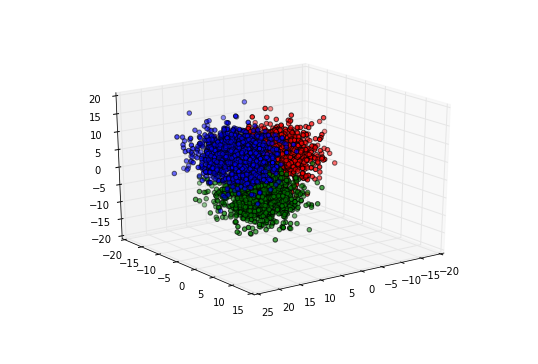

In [16]:
X, y = datasets.make_blobs(4000, n_features=3, centers=3, cluster_std=3.5, random_state=22414)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[y==0,0], X[y==0,1], X[y==0,2], c="blue")
ax.scatter(X[y==1,0], X[y==1,1], X[y==1,2], c="red")
ax.scatter(X[y==2,0], X[y==2,1], X[y==2,2], c="green")

plt.show()

In [17]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=.7)

## Model Evaluation for Different Regularization Factors

In [19]:
for l in [10**k for k in np.arange(-15,16)]:
    logreg = LogisticRegression(multi_class="multinomial", solver="newton-cg", C=1./l)
    logreg.fit(Xtrain,ytrain)
    print "lambda = " + str(l), logreg.coef_

print "\nAccuracies:"
for l in [10**k for k in np.arange(-15,16)]:
    logreg = LogisticRegression(multi_class="multinomial", solver="newton-cg", C=1./l)
    logreg.fit(Xtrain,ytrain)
    acc = (logreg.predict(Xtest) == ytest).mean()
    print "lambda = " + str(l), acc

lambda = 1e-15 [[ 0.28382275 -0.14262963  0.28334985]
 [-0.41384096 -0.03144175  0.24677784]
 [ 0.13001822  0.17407137 -0.53012769]]
lambda = 1e-14 [[ 0.28382275 -0.14262963  0.28334985]
 [-0.41384096 -0.03144175  0.24677784]
 [ 0.13001822  0.17407137 -0.53012769]]
lambda = 1e-13 [[ 0.28382275 -0.14262963  0.28334985]
 [-0.41384096 -0.03144175  0.24677784]
 [ 0.13001822  0.17407137 -0.53012769]]
lambda = 1e-12 [[ 0.28382275 -0.14262963  0.28334985]
 [-0.41384096 -0.03144175  0.24677784]
 [ 0.13001822  0.17407137 -0.53012769]]
lambda = 1e-11 [[ 0.28382275 -0.14262963  0.28334985]
 [-0.41384096 -0.03144175  0.24677784]
 [ 0.13001822  0.17407137 -0.53012769]]
lambda = 1e-10 [[ 0.28382275 -0.14262963  0.28334985]
 [-0.41384096 -0.03144175  0.24677784]
 [ 0.13001822  0.17407137 -0.53012769]]
lambda = 1e-09 [[ 0.28382275 -0.14262963  0.28334985]
 [-0.41384096 -0.03144175  0.24677784]
 [ 0.13001822  0.17407137 -0.53012769]]
lambda = 1e-08 [[ 0.28382275 -0.14262963  0.28334985]
 [-0.41384096 -

## Results

We see the coefficients of $w$ going to 0 as $\lambda$ goes to infinity, but as $\lambda$ gets too large, accuracy suffers. 

Notice that when $\lambda \in \{100, 10000\}$, the accuracy actually improved a tiny bit. Woot!